# EDA

In [482]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# pandas show all columns
pd.set_option('display.max_columns', None)

from scipy.spatial.distance import pdist, squareform

In [483]:
df = pd.read_csv('../raw/ratings_matrix.csv')
df.head()

,User_ID,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,Item_8,Item_9,Item_10
0,User_1,9.0,10.0,9.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,User_2,8.0,8.0,9.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,User_3,8.0,10.0,8.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,User_4,10.0,8.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,User_5,8.0,9.0,8.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [484]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   User_ID  20 non-null     object 
 1   Item_1   20 non-null     float64
 2   Item_2   20 non-null     float64
 3   Item_3   20 non-null     float64
 4   Item_4   20 non-null     float64
 5   Item_5   20 non-null     float64
 6   Item_6   20 non-null     float64
 7   Item_7   20 non-null     float64
 8   Item_8   20 non-null     float64
 9   Item_9   20 non-null     float64
 10  Item_10  20 non-null     float64
dtypes: float64(10), object(1)
memory usage: 1.8+ KB


In [485]:
df.describe()

,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,Item_8,Item_9,Item_10
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,2.350000,2.550000,2.450000,4.700000,4.500000,4.550000,2.300000,2.700000,2.350000,0.550000
std,3.745524,3.872644,3.804084,4.378176,4.346808,4.524495,3.643307,4.117996,3.631369,0.510418
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.500000,4.500000,4.500000,4.500000,0.000000,1.000000,0.500000,1.000000
75%,2.750000,2.750000,2.750000,8.250000,9.000000,8.250000,2.750000,3.000000,2.750000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,10.000000,1.000000


In [486]:
df.values

array([['User_1', 9.0, 10.0, 9.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
       ['User_2', 8.0, 8.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0],
       ['User_3', 8.0, 10.0, 8.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
       ['User_4', 10.0, 8.0, 10.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
       ['User_5', 8.0, 9.0, 8.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0],
       ['User_6', 0.0, 0.0, 0.0, 8.0, 8.0, 8.0, 0.0, 1.0, 0.0, 1.0],
       ['User_7', 1.0, 1.0, 0.0, 9.0, 9.0, 8.0, 1.0, 1.0, 0.0, 0.0],
       ['User_8', 0.0, 0.0, 0.0, 8.0, 8.0, 8.0, 1.0, 1.0, 1.0, 1.0],
       ['User_9', 0.0, 1.0, 1.0, 10.0, 8.0, 10.0, 1.0, 0.0, 1.0, 1.0],
       ['User_10', 0.0, 0.0, 1.0, 10.0, 9.0, 9.0, 0.0, 0.0, 1.0, 1.0],
       ['User_11', 0.0, 0.0, 0.0, 10.0, 8.0, 10.0, 0.0, 0.0, 0.0, 1.0],
       ['User_12', 0.0, 1.0, 0.0, 8.0, 9.0, 10.0, 1.0, 0.0, 0.0, 0.0],
       ['User_13', 0.0, 0.0, 1.0, 8.0, 9.0, 8.0, 0.0, 0.0, 0.0, 0.0],
       ['User_14', 0.0, 0.0, 0.0, 8.0, 9.0, 10.0, 0.0, 0.0, 0.0, 1.0],
       ['User_15',

# Preparing the data

1. Use Pandas do to load the CSV file ratings_matrix.csv
2. Work out how to get the numpy matrix that contains all the values without column headers and row indexes
3. Notice this matrix is an *explicit* user x item matrix: 
    - 0: no rating
    - 1: bad
    - 10: excelent
4. Make a copy of the matrix that represents the *implicit* data in the original matrix. That is, all non-zero values become one, and zeros stay unchanged.
5. Visualise the implicit and explicit matrices using matplotlib
6. Can you formulate any preliminary hypoteses about the relationships between groups of users and groups of items?

In [487]:
explicit_matrix = df.copy()

In [488]:
df.columns[1:]

Index(['Item_1', 'Item_2', 'Item_3', 'Item_4', 'Item_5', 'Item_6', 'Item_7',
       'Item_8', 'Item_9', 'Item_10'],
      dtype='object')

In [489]:
df[df.columns[1:]] = np.where(df[df.columns[1:]] > 0, 1, 0)
df

,User_ID,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,Item_8,Item_9,Item_10
0,User_1,1,1,1,1,0,0,0,1,0,0
1,User_2,1,1,1,0,0,0,0,0,1,1
2,User_3,1,1,1,1,0,0,0,1,0,0
3,User_4,1,1,1,1,0,0,0,0,0,0
4,User_5,1,1,1,0,1,0,0,1,1,0
5,User_6,0,0,0,1,1,1,0,1,0,1
6,User_7,1,1,0,1,1,1,1,1,0,0
7,User_8,0,0,0,1,1,1,1,1,1,1
8,User_9,0,1,1,1,1,1,1,0,1,1
9,User_10,0,0,1,1,1,1,0,0,1,1


In [490]:
df.describe()

,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,Item_8,Item_9,Item_10
count,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.450000,0.550000,0.500000,0.750000,0.65000,0.600000,0.450000,0.550000,0.500000,0.550000
std,0.510418,0.510418,0.512989,0.444262,0.48936,0.502625,0.510418,0.510418,0.512989,0.510418
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.500000,1.000000,1.00000,1.000000,0.000000,1.000000,0.500000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


- ``Item 4`` is better rated than the rest
- ``Item 3`` and ``Item 9`` receive more ratings than the rest
- ``Item 1`` and ``Item 7`` receive less ratings than the rest but their ratings are relatively balanced.

### Density to find out how sparse the data is

In [491]:
matrix = df[df.columns[1:]].values

sparsity = (1 - (np.count_nonzero(matrix) / matrix.size)) * 100

print(f"Sparsity: {sparsity:.2f}%")

Sparsity: 44.50%


### Class Distribution
- Will help understanding the distribution of the ratings

In [492]:
class_distribution = df.iloc[:, 1:].apply(pd.Series.value_counts)
class_distribution

,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,Item_8,Item_9,Item_10
0,11,9,10,5,7,8,11,9,10,9
1,9,11,10,15,13,12,9,11,10,11


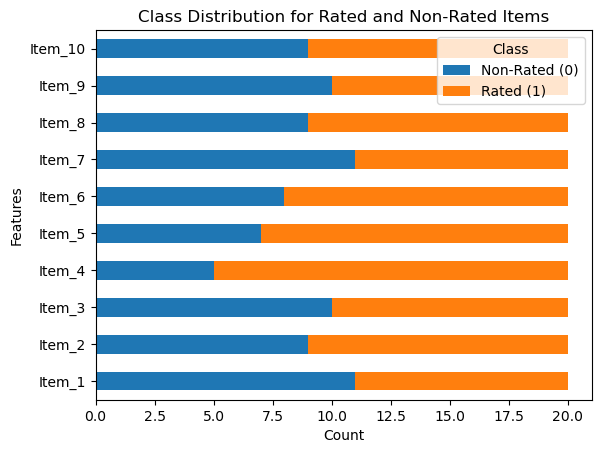

In [493]:
ax = class_distribution.T.plot(kind='barh', stacked=True)
ax.set_ylabel('Features')
ax.set_xlabel('Count')
ax.set_title('Class Distribution for Rated and Non-Rated Items')
plt.legend(title='Class', labels=['Non-Rated (0)', 'Rated (1)'])
plt.show()

In [494]:
fig = px.bar(class_distribution, x=class_distribution.index, y=df.columns[1:], 
             labels={'index': 'Class (0 or 1)', 'value': 'Count'},
             title='Class Distribution for Rated and Non-Rated Items')
fig.update_layout(title_x=0.5, legend_title_text='Items')
fig.update_xaxes(tickvals=[0, 1])
fig.show()

# Analytic computations: towards collaborative filtering

The cosine similarity between two vectots $\mathbf{v}_1$ and $\mathbf{v}_2$ is given by the formula

$$
cos(v1,v2) = \frac{\mathbf{v}_1 \cdot \mathbf{v}_2}{\|\mathbf{v}_1\| \|\mathbf{v}_2\|}
$$

Where the dot product is given by

$$
\mathbf{v}_1 \cdot \mathbf{v}_2 = \sum_{i=1}^{n} v_{1i} v_{2i}
$$

and the L2 norm 

$$
\| \mathbf{v} \| = \sqrt{\sum_{i=1}^{n} v_i^2}
$$

1. Write a Python function that computes the cosine similarity between two vectors from scratch.
2. Explore the cosine similarity between various pairs of users, and analyse the answers
3. Explore the use of `scipy.spatial.distance.pdist` to get a similarity matrix of all pairs of users in the implicit matrix first, then on the explicit ratings. Analyse and discuss your results

In [495]:
def cosine_similarity(v1, v2):
    return np.dot(v1, v2) / (np.sqrt(np.dot(v1, v1)) * np.sqrt(np.dot(v2, v2)))

results = []

for i in range(0, 20):
    for j in range(i+1, 20): # only upper triangle 20*19/2 == 190
        #df_results = df_results.append({'user1': df.values[i,0:1], 'user2': df.values[j,0:1], 'similarity': cosine_similarity(df.values[i,1:], df.values[j,1:])}, ignore_index=True)
        similarity = cosine_similarity(df.values[i,1:], df.values[j,1:])
        results.append((df.values[i,0], df.values[j,0], similarity))
        print(f'{df.values[i,0]} {df.values[j,0]} -> {similarity}')

User_1 User_2 -> 0.5999999999999999
User_1 User_3 -> 0.9999999999999998
User_1 User_4 -> 0.8944271909999159
User_1 User_5 -> 0.7302967433402214
User_1 User_6 -> 0.3999999999999999
User_1 User_7 -> 0.6761234037828131
User_1 User_8 -> 0.33806170189140655
User_1 User_9 -> 0.4743416490252569
User_1 User_10 -> 0.3651483716701107
User_1 User_11 -> 0.22360679774997896
User_1 User_12 -> 0.3999999999999999
User_1 User_13 -> 0.4472135954999579
User_1 User_14 -> 0.22360679774997896
User_1 User_15 -> 0.4472135954999579
User_1 User_16 -> 0.5070925528371099
User_1 User_17 -> 0.5070925528371099
User_1 User_18 -> 0.3999999999999999
User_1 User_19 -> 0.5477225575051661
User_1 User_20 -> 0.5070925528371099
User_2 User_3 -> 0.5999999999999999
User_2 User_4 -> 0.6708203932499369
User_2 User_5 -> 0.7302967433402214
User_2 User_6 -> 0.19999999999999996
User_2 User_7 -> 0.33806170189140655
User_2 User_8 -> 0.33806170189140655
User_2 User_9 -> 0.6324555320336759
User_2 User_10 -> 0.5477225575051661
User_2 Use

**Testing parallelism**

```python	
from multiprocessing import Pool

def calculate_similarity(user_pair):
    i, j = user_pair
    similarity = cosine_similarity(df.values[i, 1:], df.values[j, 1:])
    return (df.values[i, 0], df.values[j, 0], similarity)

# defining user pairs
user_pairs = [(i, j) for i in range(20) for j in range(i+1, 20)]

# parallelism using a Pool of worker processes
with Pool(processes=4) as pool:
    results = pool.map(calculate_similarity, user_pairs)

for result in results:
    print(f'{result[0]} {result[1]} -> {result[2]}')
```

**Without** ``numpy``

In [496]:
import math

def cosine_similarity_scratch(v1, v2):
    
    dot_product = sum(x * y for x, y in zip(v1, v2))
    
    module_v1 = math.sqrt(sum(x**2 for x in v1))
    module_v2 = math.sqrt(sum(x**2 for x in v2))
    
    # zero division
    if module_v1 == 0 or module_v2 == 0:
        return 0
    
    return dot_product / (module_v1 * module_v2)

In [497]:
df_results = pd.DataFrame(results, columns=['user_1', 'user_2', 'similarity'])
df_results.head()

,user_1,user_2,similarity
0,User_1,User_2,0.600000
1,User_1,User_3,1.000000
2,User_1,User_4,0.894427
3,User_1,User_5,0.730297
4,User_1,User_6,0.400000


In [498]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_1      190 non-null    object 
 1   user_2      190 non-null    object 
 2   similarity  190 non-null    float64
dtypes: float64(1), object(2)
memory usage: 4.6+ KB


### Top most similar users
- The pairs (``User_11``, ``User_14``) and (``User_1``, ``User_3``) are the most similar users with a similarity of ``1``.


In [499]:
# ignore df_results where user_1 == user_2
df_results = df_results[df_results['user_1'] != df_results['user_2']]
df_results.sort_values(by='similarity', ascending=False).head(10)

,user_1,user_2,similarity
147,User_11,User_14,1.000000
1,User_1,User_3,1.000000
37,User_3,User_4,0.894427
92,User_6,User_14,0.894427
2,User_1,User_4,0.894427
89,User_6,User_11,0.894427
124,User_9,User_10,0.866025
186,User_17,User_20,0.857143
119,User_8,User_16,0.857143
181,User_16,User_18,0.845154


In [500]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 189
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_1      190 non-null    object 
 1   user_2      190 non-null    object 
 2   similarity  190 non-null    float64
dtypes: float64(1), object(2)
memory usage: 5.9+ KB


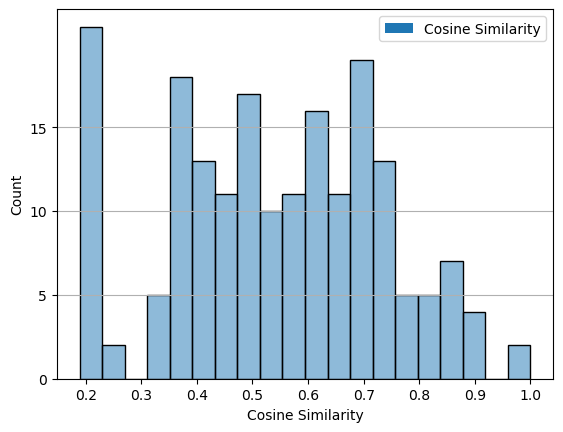

In [501]:
sns.histplot(df_results.values, bins=20)
plt.xlabel('Cosine Similarity')
plt.yticks(range(0, 20, 5))
plt.grid(axis='y')
plt.legend(['Cosine Similarity'])
plt.show()

### Least Similar Users
- The pairs (``User_4``, ``User_8``) and (``User_13``, ``User_20``) are the least similar users with a similarity of ``0.188982``.


In [502]:
df_results.sort_values(by='similarity', ascending=True).head(10)

,user_1,user_2,similarity
57,User_4,User_8,0.188982
168,User_13,User_20,0.188982
22,User_2,User_6,0.200000
28,User_2,User_12,0.200000
173,User_14,User_19,0.204124
78,User_5,User_14,0.204124
75,User_5,User_11,0.204124
178,User_15,User_19,0.204124
152,User_11,User_19,0.204124
31,User_2,User_15,0.223607


In [503]:
df_results_pivot = df_results.pivot(index='user_1', columns='user_2', values='similarity')
# sorting df by user_id
df_results_pivot.sort_index(axis=0, key=lambda x: x.str[5:].astype(int), inplace=True)
df_results_pivot.sort_index(axis=1, key=lambda x: x.str[5:].astype(int), inplace=True)
df_results_pivot

user_2,User_2,User_3,User_4,User_5,User_6,User_7,User_8,User_9,User_10,User_11,User_12,User_13,User_14,User_15,User_16,User_17,User_18,User_19,User_20
user_1,,,,,,,,,,,,,,,,,,,
User_1,0.6,1.0,0.894427,0.730297,0.400000,0.676123,0.338062,0.474342,0.365148,0.223607,0.400000,0.447214,0.223607,0.447214,0.507093,0.507093,0.400000,0.547723,0.507093
User_2,NaN,0.6,0.670820,0.730297,0.200000,0.338062,0.338062,0.632456,0.547723,0.223607,0.200000,0.223607,0.223607,0.223607,0.507093,0.676123,0.400000,0.547723,0.676123
User_3,NaN,NaN,0.894427,0.730297,0.400000,0.676123,0.338062,0.474342,0.365148,0.223607,0.400000,0.447214,0.223607,0.447214,0.507093,0.507093,0.400000,0.547723,0.507093
User_4,NaN,NaN,NaN,0.612372,0.223607,0.566947,0.188982,0.530330,0.408248,0.250000,0.447214,0.500000,0.250000,0.500000,0.377964,0.377964,0.223607,0.408248,0.377964
User_5,NaN,NaN,NaN,NaN,0.365148,0.617213,0.462910,0.577350,0.500000,0.204124,0.365148,0.408248,0.204124,0.408248,0.462910,0.771517,0.365148,0.666667,0.771517
User_6,NaN,NaN,NaN,NaN,NaN,0.676123,0.845154,0.632456,0.730297,0.894427,0.600000,0.670820,0.894427,0.670820,0.676123,0.507093,0.600000,0.365148,0.507093
User_7,NaN,NaN,NaN,NaN,NaN,NaN,0.714286,0.668153,0.462910,0.566947,0.845154,0.566947,0.566947,0.755929,0.714286,0.571429,0.507093,0.617213,0.714286
User_8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.801784,0.771517,0.755929,0.676123,0.566947,0.755929,0.566947,0.857143,0.714286,0.845154,0.617213,0.714286
User_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.866025,0.707107,0.790569,0.707107,0.707107,0.530330,0.801784,0.668153,0.632456,0.721688,0.668153


In [504]:
fig = px.imshow(df_results_pivot)
fig.show()

Using ``squareform`` to get the full matrix

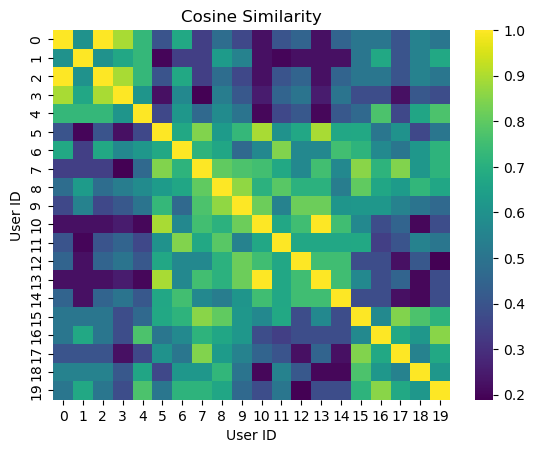

In [505]:
square_similarity = squareform(df_results['similarity'])

# set the diagonal elements to 1
np.fill_diagonal(square_similarity, 1)

sns.heatmap(square_similarity, cmap='viridis')
plt.xlabel('User ID')
plt.ylabel('User ID')
plt.title('Cosine Similarity')
plt.show()

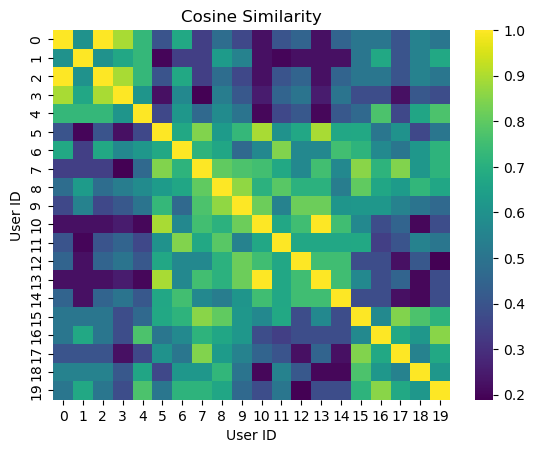

In [506]:
square_similarity = squareform(df_results['similarity'])

# set the diagonal elements to 1
np.fill_diagonal(square_similarity, 1)

sns.heatmap(square_similarity, cmap='viridis')
plt.xlabel('User ID')
plt.ylabel('User ID')
plt.title('Cosine Similarity')
plt.show()

## Using ``scipy.spatial.distance.pdist``

In [507]:
from scipy.spatial.distance import pdist, squareform

pdist(df.values[0:2,1:], metric='cosine')

# similarity matrix of all pairs
similarity_matrix = pdist(df.values[:,1:], metric='cosine')
similarity_matrix

array([4.00000000e-01, 2.22044605e-16, 1.05572809e-01, 2.69703257e-01,
       6.00000000e-01, 3.23876596e-01, 6.61938298e-01, 5.25658351e-01,
       6.34851628e-01, 7.76393202e-01, 6.00000000e-01, 5.52786405e-01,
       7.76393202e-01, 5.52786405e-01, 4.92907447e-01, 4.92907447e-01,
       6.00000000e-01, 4.52277442e-01, 4.92907447e-01, 4.00000000e-01,
       3.29179607e-01, 2.69703257e-01, 8.00000000e-01, 6.61938298e-01,
       6.61938298e-01, 3.67544468e-01, 4.52277442e-01, 7.76393202e-01,
       8.00000000e-01, 7.76393202e-01, 7.76393202e-01, 7.76393202e-01,
       4.92907447e-01, 3.23876596e-01, 6.00000000e-01, 4.52277442e-01,
       3.23876596e-01, 1.05572809e-01, 2.69703257e-01, 6.00000000e-01,
       3.23876596e-01, 6.61938298e-01, 5.25658351e-01, 6.34851628e-01,
       7.76393202e-01, 6.00000000e-01, 5.52786405e-01, 7.76393202e-01,
       5.52786405e-01, 4.92907447e-01, 4.92907447e-01, 6.00000000e-01,
       4.52277442e-01, 4.92907447e-01, 3.87627564e-01, 7.76393202e-01,
      

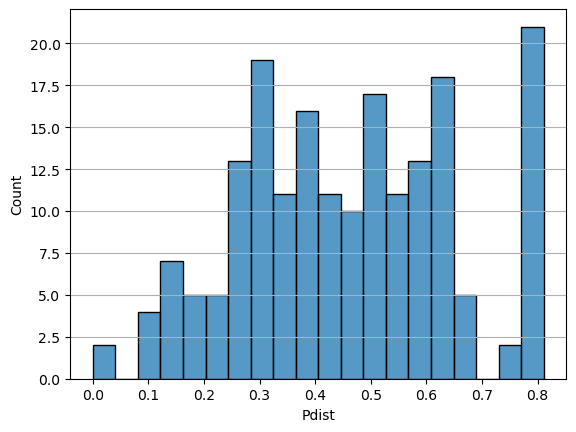

In [508]:
sns.histplot(similarity_matrix, bins=20)
plt.xlabel('Pdist')
plt.grid(axis='y')
plt.show()

In [509]:
similarity_matrix

array([4.00000000e-01, 2.22044605e-16, 1.05572809e-01, 2.69703257e-01,
       6.00000000e-01, 3.23876596e-01, 6.61938298e-01, 5.25658351e-01,
       6.34851628e-01, 7.76393202e-01, 6.00000000e-01, 5.52786405e-01,
       7.76393202e-01, 5.52786405e-01, 4.92907447e-01, 4.92907447e-01,
       6.00000000e-01, 4.52277442e-01, 4.92907447e-01, 4.00000000e-01,
       3.29179607e-01, 2.69703257e-01, 8.00000000e-01, 6.61938298e-01,
       6.61938298e-01, 3.67544468e-01, 4.52277442e-01, 7.76393202e-01,
       8.00000000e-01, 7.76393202e-01, 7.76393202e-01, 7.76393202e-01,
       4.92907447e-01, 3.23876596e-01, 6.00000000e-01, 4.52277442e-01,
       3.23876596e-01, 1.05572809e-01, 2.69703257e-01, 6.00000000e-01,
       3.23876596e-01, 6.61938298e-01, 5.25658351e-01, 6.34851628e-01,
       7.76393202e-01, 6.00000000e-01, 5.52786405e-01, 7.76393202e-01,
       5.52786405e-01, 4.92907447e-01, 4.92907447e-01, 6.00000000e-01,
       4.52277442e-01, 4.92907447e-01, 3.87627564e-01, 7.76393202e-01,
      

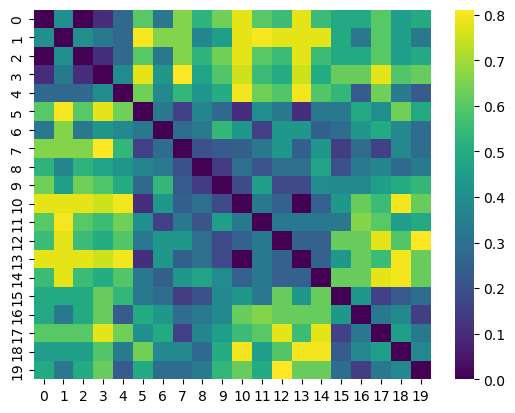

In [510]:
sns.heatmap(squareform(similarity_matrix), cmap='viridis')
plt.show()


# Recommendation

## User Based Collaborative Filtering

- Calculate User Similarities
- Find similar users
- Identify Unrated Items
- Recommend Items
- Sort and Return Top-N Items

In [511]:
df.head(2)

,User_ID,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,Item_8,Item_9,Item_10
0,User_1,1,1,1,1,0,0,0,1,0,0
1,User_2,1,1,1,0,0,0,0,0,1,1


In [512]:
df.set_index('User_ID', inplace=True)
df.head(2)

,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,Item_8,Item_9,Item_10
User_ID,,,,,,,,,,
User_1,1,1,1,1,0,0,0,1,0,0
User_2,1,1,1,0,0,0,0,0,1,1


In [513]:
def user_based_collaborative_filtering(user_item_matrix: np.ndarray, target_user: int, num_recommendations: int = 5) -> list[int]:
    """Function that implements user-based collaborative filtering.

    Args:
        user_item_matrix (numpy.ndarray): numpy.ndarray with user-item interactions
        target_user (int): Target user ID - row index of the user-item matrix
        num_recommendations (int, optional): Number of recommendations - Defaults to 5.

    Returns:
        list[int]: List of recommended item IDs - column indices of the user-item matrix
    """
    
    user_similarities = np.dot(user_item_matrix, user_item_matrix[target_user]) / (np.linalg.norm(user_item_matrix, axis=1) * np.linalg.norm(user_item_matrix[target_user]))
    
    print(f'Similarities of User_{target_user + 1}: {user_similarities}\n')
    
    # finding similar users (need to exclude the target user)
    similar_users = np.argsort(user_similarities)[::-1][1:]
    # TODO: test behaviour because there might be users with same similarity
    # excluding the first might exclude the wrong one instead of the target user
    # should I remove when similarity is 1?
    
    # finding out unrated items for the target user
    unrated_items = np.where(user_item_matrix[target_user] == 0)[0]
    
    print(f'Unrated items of User_{target_user + 1}: {unrated_items}\n')
    
    # return immediately if there are no unrated items
    if unrated_items.size == 0:
        return []
    
    # recommendations for target user
    recommendations = np.zeros(user_item_matrix.shape[1])
    
    
    """ 
    for user in similar_users:
        user_ratings = user_item_matrix[user]
        recommendations += user_similarities[user] * user_ratings
    """ 
    
    # recommendations only for items that are unrated by the target user
    for user in similar_users:
        
        unrated_user_ratings = user_item_matrix[user] * (user_item_matrix[target_user] == 0)
        
        recommendations += user_similarities[user] * unrated_user_ratings
    
    print(f'Recommendations for User_{target_user + 1}: {recommendations}\n')
    
    # sorting
    sorted_recommendations = np.argsort(recommendations)[::-1]
    
    # top-n recommendations
    return sorted_recommendations[:num_recommendations]

In [514]:
help(user_based_collaborative_filtering)

Help on function user_based_collaborative_filtering in module __main__:

user_based_collaborative_filtering(user_item_matrix: numpy.ndarray, target_user: int, num_recommendations: int = 5) -> list[int]
    Function that implements user-based collaborative filtering.
    
    Args:
        user_item_matrix (numpy.ndarray): numpy.ndarray with user-item interactions
        target_user (int): Target user ID - row index of the user-item matrix
        num_recommendations (int, optional): Number of recommendations - Defaults to 5.
    
    Returns:
        list[int]: List of recommended item IDs - column indices of the user-item matrix



In [515]:
target_user = 0
num_recommendations = 3

recommendations = user_based_collaborative_filtering(df.values,
                                                     target_user,
                                                     num_recommendations)

print(f'Recommendations: {recommendations}\n')

print(f"Recommended items for {df.index[target_user]}:")
for item in recommendations:
    print(f'- Item: {df.columns[item]}')
    

Similarities of User_1: [1.         0.6        1.         0.89442719 0.73029674 0.4
 0.6761234  0.3380617  0.47434165 0.36514837 0.2236068  0.4
 0.4472136  0.2236068  0.4472136  0.50709255 0.50709255 0.4
 0.54772256 0.50709255]

Unrated items of User_1: [4 5 6 8 9]

Recommendations for User_1: [0.         0.         0.         0.         5.73979776 5.05013102
 4.35752697 0.         4.97684868 4.54604298]

Recommendations: [4 5 8]

Recommended items for User_1:
- Item: Item_5
- Item: Item_6
- Item: Item_9


In [516]:
def calculate_pearson_correlation(v1:np.ndarray, v2: np.ndarray, verbose: bool = False) -> float:
    """Calculates the Pearson correlation coefficient between two vectors.

    Args:
        v1 (numpy.ndarray): Vector 1
        v2 (numpy.ndarray): Vector 2
        verbose (bool, optional): Print intermediate results. Defaults to False.

    Returns:
        float: Pearson correlation coefficient
    """
    
    # Pearson's correlation coefficient - to resolve data sparsiness problem
    common_indices = np.logical_and(v1 > 0, v2 > 0)
    
    # means of items rated (not zeros)
    v1_mean = sum(v1) / np.count_nonzero(v1)
    v2_mean = sum(v2) / np.count_nonzero(v2)  
    
    # numerator of person correlation
    numerator = np.sum((v1[common_indices] - v1_mean) * (v2[common_indices] - v2_mean))
    
    # denominator
    denominator = np.sqrt(np.sum((v1[common_indices] - v1_mean)**2)) * np.sqrt(np.sum((v2[common_indices] - v2_mean)**2))
    
    if verbose:
        print(f'Common indices: {common_indices}')
        print(f'Means: {v1_mean}, {v2_mean}')
        print(f'Numerator: {numerator}')
        print(f'Denominator: {denominator}')
    
    # zero division
    if denominator == 0:
        return 0
    
    return numerator / denominator

In [517]:
from scipy.stats import pearsonr

def calculate_similarity(user1_ratings, user2_ratings, similarity='cosine'):
    
    if similarity == 'cosine':
        # Cosine similarity
        
        magnitudes = (np.linalg.norm(user1_ratings) * np.linalg.norm(user2_ratings))
        
        # avoiding zero division
        if magnitudes == 0:
            
            magnitudes += 1e-6
            
        return np.dot(user1_ratings, user2_ratings) / magnitudes
    
    elif similarity == 'pearson':
        
        # Pearson's correlation coefficient - to resolve data sparsiness problem
        return calculate_pearson_correlation(user1_ratings, user2_ratings)
    
    else:
        raise ValueError('Invalid similarity!')

In [518]:
explicit_matrix.head(2)

,User_ID,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,Item_8,Item_9,Item_10
0,User_1,9.0,10.0,9.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,User_2,8.0,8.0,9.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [519]:
explicit_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   User_ID  20 non-null     object 
 1   Item_1   20 non-null     float64
 2   Item_2   20 non-null     float64
 3   Item_3   20 non-null     float64
 4   Item_4   20 non-null     float64
 5   Item_5   20 non-null     float64
 6   Item_6   20 non-null     float64
 7   Item_7   20 non-null     float64
 8   Item_8   20 non-null     float64
 9   Item_9   20 non-null     float64
 10  Item_10  20 non-null     float64
dtypes: float64(10), object(1)
memory usage: 1.8+ KB


Using ``Pearson's correlation``

In [520]:
explicit_matrix.values[0][1:]

array([9.0, 10.0, 9.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], dtype=object)

In [521]:
explicit_matrix.values[9][1:]

array([0.0, 0.0, 1.0, 10.0, 9.0, 9.0, 0.0, 0.0, 1.0, 1.0], dtype=object)

In [522]:
calculate_pearson_correlation(explicit_matrix.values[0][1:], explicit_matrix.values[9][1:], verbose=True)

Common indices: [False False  True  True False False False False False False]
Means: 6.0, 5.166666666666667
Numerator: -36.666666666666664
Denominator: 37.20961643924264


-0.985408348041896

In [523]:
calculate_similarity(explicit_matrix.values[0][1:], explicit_matrix.values[9][1:], similarity='pearson')

-0.985408348041896

In [524]:
explicit_matrix.values[0][2:]

array([10.0, 9.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], dtype=object)

In [525]:
f"{calculate_similarity(explicit_matrix.values[2][1:], explicit_matrix.values[12][1:], similarity='pearson')}"

'-0.679542852931416'

Calculating the similarity matrix using Pearson's correlation

In [526]:
def calculate_similarity_matrix(user_item_matrix: np.ndarray, similarity: str = 'cosine'):
    """Calculates the similarity matrix for all users.

    Args:
        user_item_matrix (numpy.ndarray): numpy.ndarray with user-item interactions
        similarity (str, optional): Similarity measure. Defaults to 'cosine'.

    Returns:
        numpy.ndarray: Similarity matrix
    """
    
    num_users = user_item_matrix.shape[0]
    
    similarity_matrix = np.zeros((num_users, num_users))
    
    # Calculates full matrix and sets diagonal to 1
    for i in range(num_users):
        for j in range(i+1, num_users):
            similarity_matrix[i, j] = calculate_similarity(user_item_matrix[i], user_item_matrix[j], similarity)
            similarity_matrix[j, i] = similarity_matrix[i, j]
    
    for i in range(num_users):
        similarity_matrix[i, i] = 1
            
    return similarity_matrix

In [527]:
explicit_matrix.values[:,1:]

array([[9.0, 10.0, 9.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
       [8.0, 8.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0],
       [8.0, 10.0, 8.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
       [10.0, 8.0, 10.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
       [8.0, 9.0, 8.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0],
       [0.0, 0.0, 0.0, 8.0, 8.0, 8.0, 0.0, 1.0, 0.0, 1.0],
       [1.0, 1.0, 0.0, 9.0, 9.0, 8.0, 1.0, 1.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 8.0, 8.0, 8.0, 1.0, 1.0, 1.0, 1.0],
       [0.0, 1.0, 1.0, 10.0, 8.0, 10.0, 1.0, 0.0, 1.0, 1.0],
       [0.0, 0.0, 1.0, 10.0, 9.0, 9.0, 0.0, 0.0, 1.0, 1.0],
       [0.0, 0.0, 0.0, 10.0, 8.0, 10.0, 0.0, 0.0, 0.0, 1.0],
       [0.0, 1.0, 0.0, 8.0, 9.0, 10.0, 1.0, 0.0, 0.0, 0.0],
       [0.0, 0.0, 1.0, 8.0, 9.0, 8.0, 0.0, 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 8.0, 9.0, 10.0, 0.0, 0.0, 0.0, 1.0],
       [1.0, 0.0, 0.0, 10.0, 10.0, 8.0, 0.0, 0.0, 0.0, 0.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 9.0, 10.0, 10.0, 1.0],
       [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 8.0

In [528]:
calculate_similarity_matrix(explicit_matrix.values[:,1:], similarity='pearson')

array([[ 1.        ,  0.96649486,  0.99471672,  0.89293116,  0.98218303,
         0.19611614, -0.47098684, -0.14142136, -0.9858789 , -0.98540835,
        -1.        , -0.89324096, -0.72198821, -1.        , -0.81627121,
        -0.37519832, -0.99978124,  0.09950372, -0.99056375, -0.99293803],
       [ 0.96649486,  1.        ,  0.92042467,  0.93221855,  0.96215472,
         1.        , -1.        ,  1.        ,  0.17005455,  0.41762017,
         1.        , -1.        , -1.        ,  1.        , -1.        ,
        -0.329749  , -0.42842033,  0.24904104, -0.97051561, -0.36851058],
       [ 0.99471672,  0.92042467,  1.        ,  0.84773064,  0.9756651 ,
         0.19611614, -0.4764405 , -0.14142136, -0.96525112, -0.97353587,
        -1.        , -0.92945833, -0.67954285, -1.        , -0.78045557,
        -0.40276107, -0.99889374,  0.09950372, -0.97594979, -0.97407232],
       [ 0.89293116,  0.93221855,  0.84773064,  1.        ,  0.8510395 ,
        -1.        , -0.90089447, -1.        , -

<Axes: >

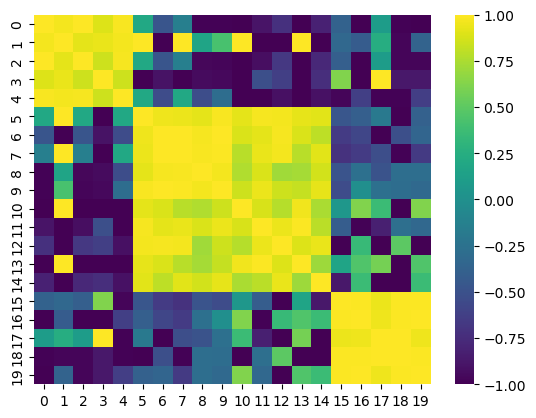

In [529]:
sns.heatmap(calculate_similarity_matrix(explicit_matrix.values[:,1:], similarity='pearson'), cmap='viridis')

In [530]:
calculate_similarity_matrix(explicit_matrix.values[:,1:], similarity='pearson')

array([[ 1.        ,  0.96649486,  0.99471672,  0.89293116,  0.98218303,
         0.19611614, -0.47098684, -0.14142136, -0.9858789 , -0.98540835,
        -1.        , -0.89324096, -0.72198821, -1.        , -0.81627121,
        -0.37519832, -0.99978124,  0.09950372, -0.99056375, -0.99293803],
       [ 0.96649486,  1.        ,  0.92042467,  0.93221855,  0.96215472,
         1.        , -1.        ,  1.        ,  0.17005455,  0.41762017,
         1.        , -1.        , -1.        ,  1.        , -1.        ,
        -0.329749  , -0.42842033,  0.24904104, -0.97051561, -0.36851058],
       [ 0.99471672,  0.92042467,  1.        ,  0.84773064,  0.9756651 ,
         0.19611614, -0.4764405 , -0.14142136, -0.96525112, -0.97353587,
        -1.        , -0.92945833, -0.67954285, -1.        , -0.78045557,
        -0.40276107, -0.99889374,  0.09950372, -0.97594979, -0.97407232],
       [ 0.89293116,  0.93221855,  0.84773064,  1.        ,  0.8510395 ,
        -1.        , -0.90089447, -1.        , -

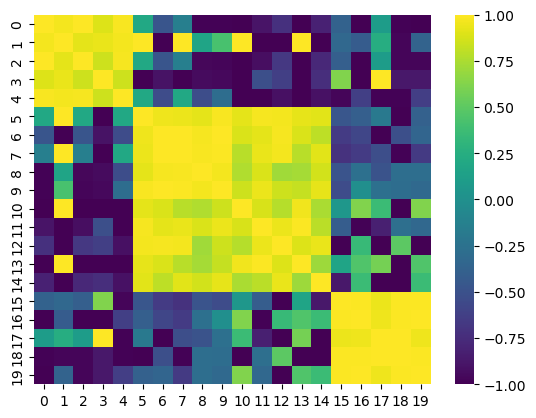

In [531]:
sns.heatmap(calculate_similarity_matrix(explicit_matrix.values[:,1:], similarity='pearson'), cmap='viridis');

Calculate similarity for a **single user**

In [532]:
def calculate_similarity_target_user(user_item_matrix: np.ndarray, target_user: int, similarity: str = 'cosine'):
    """Calculates the similarity matrix for a single user.

    Args:
        user_item_matrix (numpy.ndarray): numpy.ndarray with user-item interactions
        target_user (int): Target user ID - row index of the user-item matrix
        similarity (str, optional): Similarity measure. Defaults to 'cosine'.

    Returns:
        numpy.ndarray: Similarity matrix
    """
    
    num_users = user_item_matrix.shape[0]
    
    similarity_matrix = np.zeros(num_users)
    
    # Calculates full matrix and sets diagonal to 1
    for i in range(num_users):
        if i != target_user:
            similarity_matrix[i] = calculate_similarity(user_item_matrix[target_user], user_item_matrix[i], similarity)
            
    
    similarity_matrix[target_user] = 1
    
    return similarity_matrix

In [533]:
calculate_similarity_target_user(explicit_matrix.values[:,1:], 0, similarity='pearson')

array([ 1.        ,  0.96649486,  0.99471672,  0.89293116,  0.98218303,
        0.19611614, -0.47098684, -0.14142136, -0.9858789 , -0.98540835,
       -1.        , -0.89324096, -0.72198821, -1.        , -0.81627121,
       -0.37519832, -0.99978124,  0.09950372, -0.99056375, -0.99293803])

Converts the similarity metric to distance

In [534]:
def similarity_to_distance(similarity_matrix: np.ndarray, user_1: int, user_2: int, similarity: str = 'cosine') -> float:
    """Converts the similarity to distance between two users.
    - Cosine similarity: 1 - similarity
    - Pearson correlation coefficient: (1 - similarity) / 2
    
    The closer the distance to 0, the more similar the users are.

    Args:
        similarity_matrix (np.ndarray): similarity matrix or vector
        user_1 (int): target user 1
        user_2 (int): target user 2
        similarity (str, optional): similarity type. Defaults to 'cosine'.

    Raises:
        ValueError: Inavlid similarity type

    Returns:
        float: the distance between the two users
    """
    
    if len(similarity_matrix.shape) == 2: # full similarity matrix
    
        if similarity == 'cosine':
            return 1 - similarity_matrix[user_1][user_2]
        elif similarity == 'pearson':
            return (1 - similarity_matrix[user_1][user_2]) / 2

    if len(similarity_matrix.shape) == 1: # similarity vector
    
        if similarity == 'cosine':
            return 1 - similarity_matrix[user_2]
        elif similarity == 'pearson':
            return (1 - similarity_matrix[user_2]) / 2

    raise ValueError('Invalid similarity!')

In [535]:
user_1, user_2 = [0, 0] # expected minimum distance (0) since similarity is (1)

similarity_vector = calculate_similarity_target_user(explicit_matrix.values[:,1:], user_1, similarity='pearson')

print(f"Similarity vector for User_{user_1 + 1}:\n\n{similarity_vector}", end='\n\n')

print(f"Distance between User {user_1 + 1} and {user_2 + 1} = {similarity_to_distance(similarity_vector, user_1, user_2, similarity='pearson')}")

user_1, user_2 = [0, 10] # expected max distance (1) since we have max dissimilarity (-1)
print(f"Distance between User {user_1 + 1} and {user_2 + 1} = {similarity_to_distance(similarity_vector, user_1, user_2, similarity='pearson')}")

Similarity vector for User_1:

[ 1.          0.96649486  0.99471672  0.89293116  0.98218303  0.19611614
 -0.47098684 -0.14142136 -0.9858789  -0.98540835 -1.         -0.89324096
 -0.72198821 -1.         -0.81627121 -0.37519832 -0.99978124  0.09950372
 -0.99056375 -0.99293803]

Distance between User 1 and 1 = 0.0
Distance between User 1 and 11 = 1.0


User based collaborative filtering

In [536]:
def user_based_collaborative_filtering(user_item_matrix: np.ndarray, target_user: int, num_recommendations: int = 5, similarity: str = 'cosine', verbose: bool = False) -> list[int]:
    """Function that implements user-based collaborative filtering.

    Args:
        user_item_matrix (numpy.ndarray): numpy.ndarray with user-item interactions
        target_user (int): Target user ID - row index of the user-item matrix
        num_recommendations (int, optional): Number of recommendations - Defaults to 5.
        similarity (str, optional): Similarity measure. Defaults to 'cosine'.

    Returns:
        list[int]: List of recommended item IDs - column indices of the user-item matrix
    """
    
    # similarity vector
    similarity_vector = calculate_similarity_target_user(user_item_matrix, target_user, similarity)
    
    # similarity to distance - so I can use the same function to different similarity types
    distance_vector = np.zeros(similarity_vector.shape)
    for user in range(similarity_vector.shape[0]):
        distance_vector[user] = similarity_to_distance(similarity_vector, target_user, user, similarity)
    
    # finding similar users (need to exclude the target user)
    similar_users = np.argsort(similarity_vector)[::-1][1:]
    
    # finding out unrated items for the target user
    unrated_items = np.where(user_item_matrix[target_user] == 0)[0]
    
    # no unrated items
    if unrated_items.size == 0:
        return []
    
    # recommendations for target user
    recommendations = np.zeros(user_item_matrix.shape[1])
    
    # recommendations only for items that are unrated by the target user
    for user in similar_users:
        unrated_user_ratings = user_item_matrix[user].astype(float) * (user_item_matrix[target_user] == 0) # distance metric
        recommendations += (1 - distance_vector[user]) * unrated_user_ratings # distance metric: [1 - distance] so the closest user (distance near 0) has the highest weight
    
    if verbose:
        print(f'Similarity vector of User_{target_user + 1}: {similarity_vector}\n')
        print(f'Distance vector of User_{target_user + 1}: {distance_vector}\n')
        print(f'Similar users: {similar_users}\n')
        print(f'Unrated items of User_{target_user + 1}: {unrated_items}\n')
        print(f'Recommendations for User_{target_user + 1}: {recommendations}\n')
        #print(f"(user_item_matrix[target_user] == 0): {user_item_matrix[target_user] == 0}")
        #print(f"Data types - similarity_vector: {similarity_vector.dtype}, unrated_user_ratings: {unrated_user_ratings.dtype}, recommendations: {recommendations.dtype}")
    
    # sorting
    sorted_recommendations = np.argsort(recommendations)[::-1]
    
    # top-n recommendations
    return sorted_recommendations[:num_recommendations]

Recommendations using **Cosine Similarity**

In [537]:
target_user = 0
num_recommendations = 3
similarity = 'cosine'

recommendations = user_based_collaborative_filtering(explicit_matrix.values[:,1:],
                                                     target_user=target_user,
                                                     num_recommendations=num_recommendations,
                                                     similarity=similarity,
                                                     verbose=True)



print(f"Recommended items for {df.index[target_user]}:")
for item in recommendations:
    print(f'- Item: {df.columns[item]}')

Similarity vector of User_1: [1.         0.98721724 0.99831874 0.98676925 0.9933401  0.03976854
 0.11768798 0.03956512 0.1088228  0.07183378 0.03780725 0.07048912
 0.07220002 0.03139211 0.07183378 0.07655876 0.11313893 0.04236984
 0.11835542 0.11310879]

Distance vector of User_1: [0.         0.01278276 0.00168126 0.01323075 0.0066599  0.96023146
 0.88231202 0.96043488 0.8911772  0.92816622 0.96219275 0.92951088
 0.92779998 0.96860789 0.92816622 0.92344124 0.88686107 0.95763016
 0.88164458 0.88689121]

Similar users: [ 2  4  1  3 18  6 16 19  8 15 12 14  9 11 17  5  7 10 13]

Unrated items of User_1: [4 5 6 8 9]

Recommendations for User_1: [0.         0.         0.         0.         7.01806233 6.05497445
 4.23448649 0.         6.06215048 1.66158316]

Recommended items for User_1:
- Item: Item_5
- Item: Item_9
- Item: Item_6


Recommendations using **Pearson's Correlation**

In [538]:
target_user = 0
num_recommendations = 3
similarity = 'pearson'

recommendations = user_based_collaborative_filtering(explicit_matrix.values[:,1:],
                                                     target_user=target_user,
                                                     num_recommendations=num_recommendations,
                                                     similarity=similarity,
                                                     verbose=True)



print(f"Recommended items for {df.index[target_user]}:")
for item in recommendations:
    print(f'- Item: {df.columns[item]}')

Similarity vector of User_1: [ 1.          0.96649486  0.99471672  0.89293116  0.98218303  0.19611614
 -0.47098684 -0.14142136 -0.9858789  -0.98540835 -1.         -0.89324096
 -0.72198821 -1.         -0.81627121 -0.37519832 -0.99978124  0.09950372
 -0.99056375 -0.99293803]

Distance vector of User_1: [0.         0.01675257 0.00264164 0.05353442 0.00890849 0.40194193
 0.73549342 0.57071068 0.99293945 0.99270417 1.         0.94662048
 0.8609941  1.         0.90813561 0.68759916 0.99989062 0.45024814
 0.99528188 0.99646901]

Similar users: [ 2  4  1  3  5 17  7 15  6 12 14 11  9  8 18 19 16 10 13]

Unrated items of User_1: [4 5 6 8 9]

Recommendations for User_1: [ 0.          0.          0.          0.         14.36632975 13.16897618
  8.03425731  0.         10.00687583  2.89074426]

Recommended items for User_1:
- Item: Item_5
- Item: Item_6
- Item: Item_9


# Research `Hierarchical Clustering` for different **linkage** methods:
- SINGLE
- WARD
- AVERAGE

Distance metrics:
- Euclidean: is the square root of the sum of the squared differences between the coordinates of the points (distance between two points)

- Manhattan: is the sum of the absolute differences between the coordinates of the points

- Cosine: is the dot product of the two vectors divided by the product of the two vectors' lengths (or magnitudes)

Efficiency of the algorithms:
- SINGLE: O(n^2)
- WARD: O(n^2)
- AVERAGE: O(n^2)

Using ``scipy.cluster.hierarchy``

In [539]:
from scipy.cluster.hierarchy import linkage, dendrogram
import plotly.figure_factory as ff

explicit_matrix.set_index('User_ID', inplace=True) # handle the labels better

BASIC EXAMPLE from scipy documentation

[[2], [8], [0], [4], [1], [9], [9], [0]]


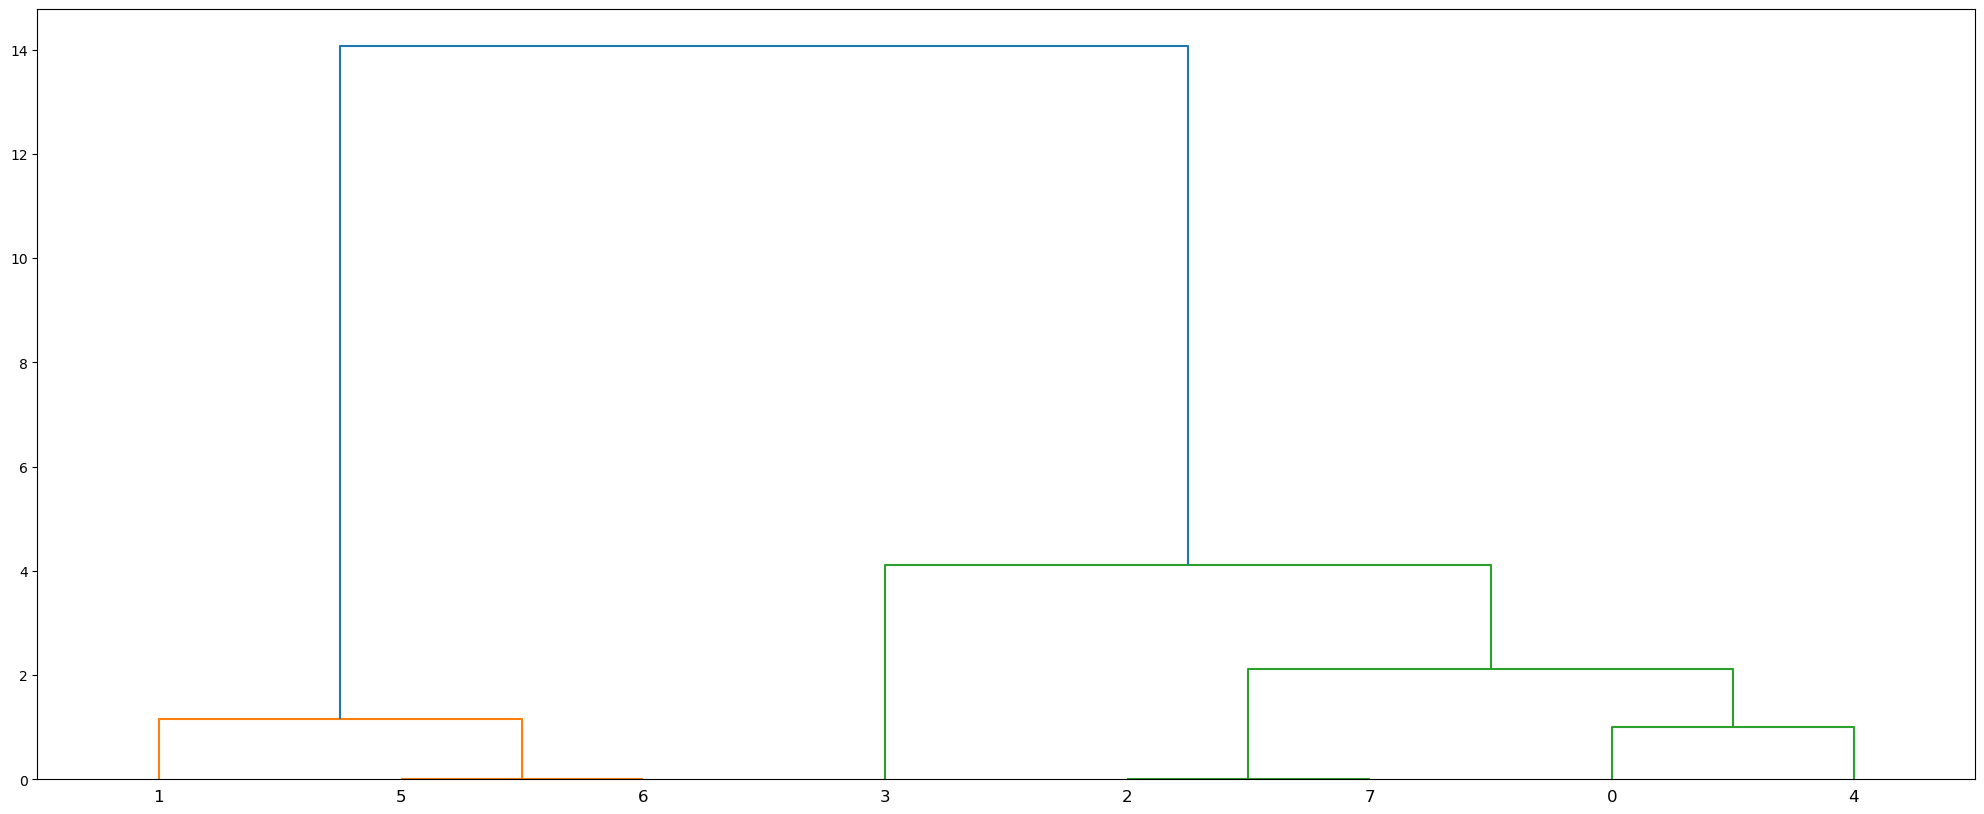

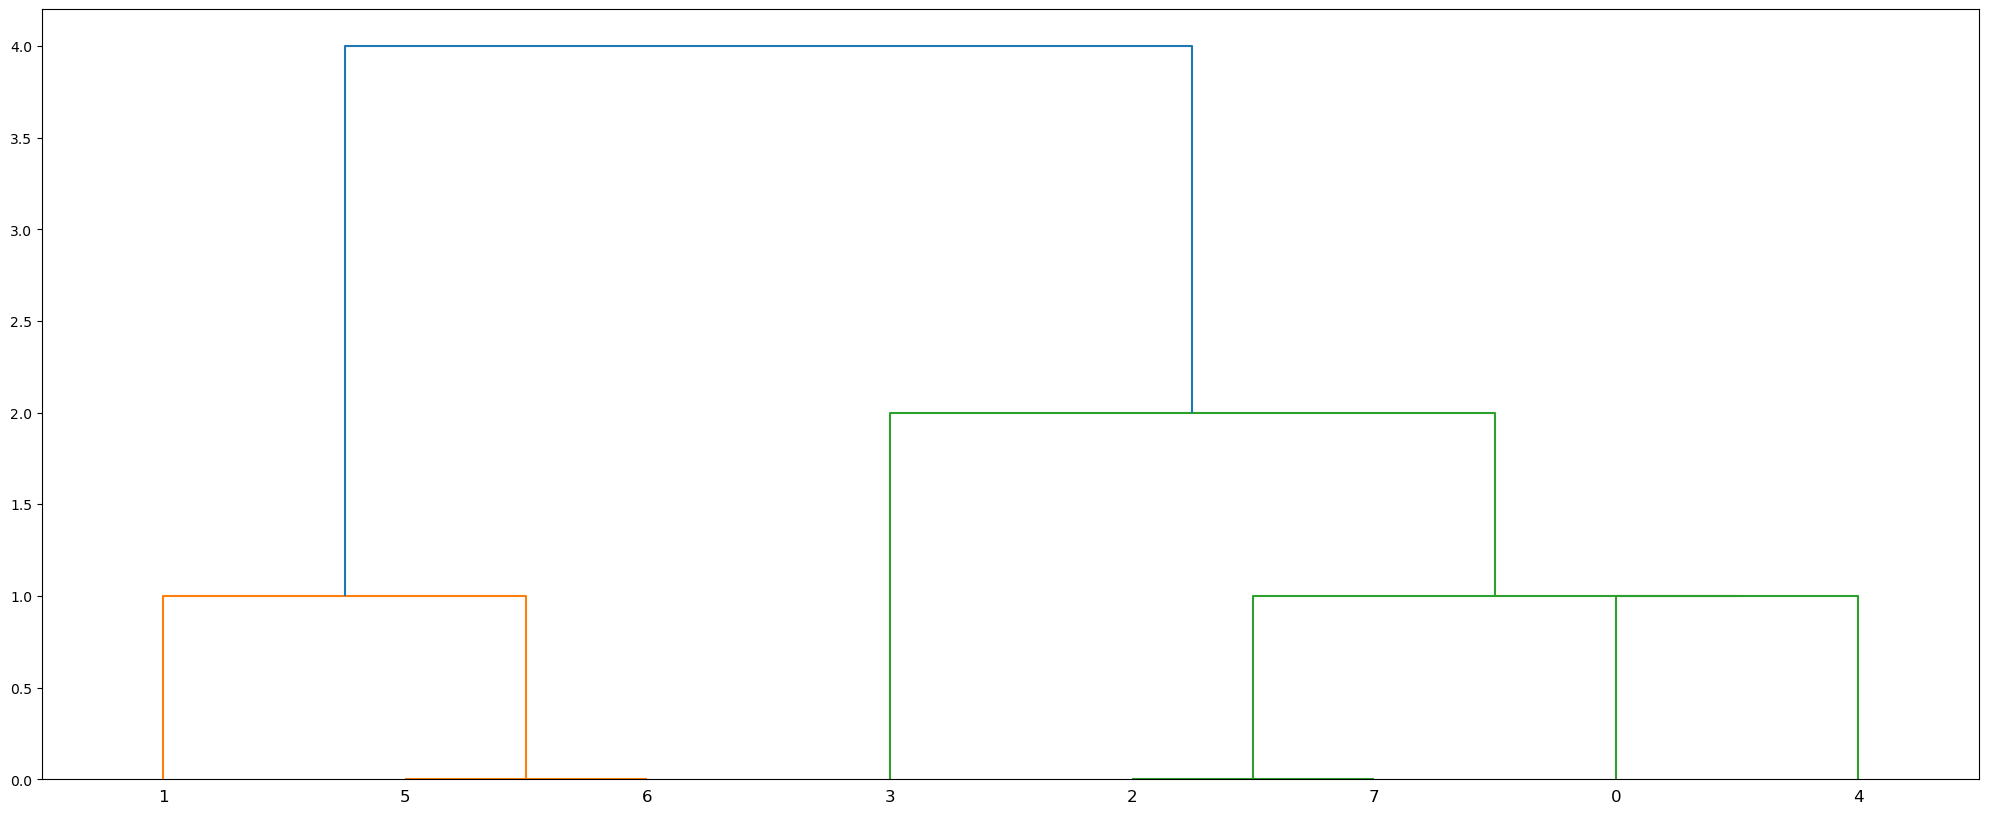

In [540]:
X = [[i] for i in [2, 8, 0, 4, 1, 9, 9, 0]]
print(X)
X = np.array(X)
Z = linkage(X, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
Z = linkage(X, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

`SINGLE` linkage method
- shortest distance between any two points in the two clusters

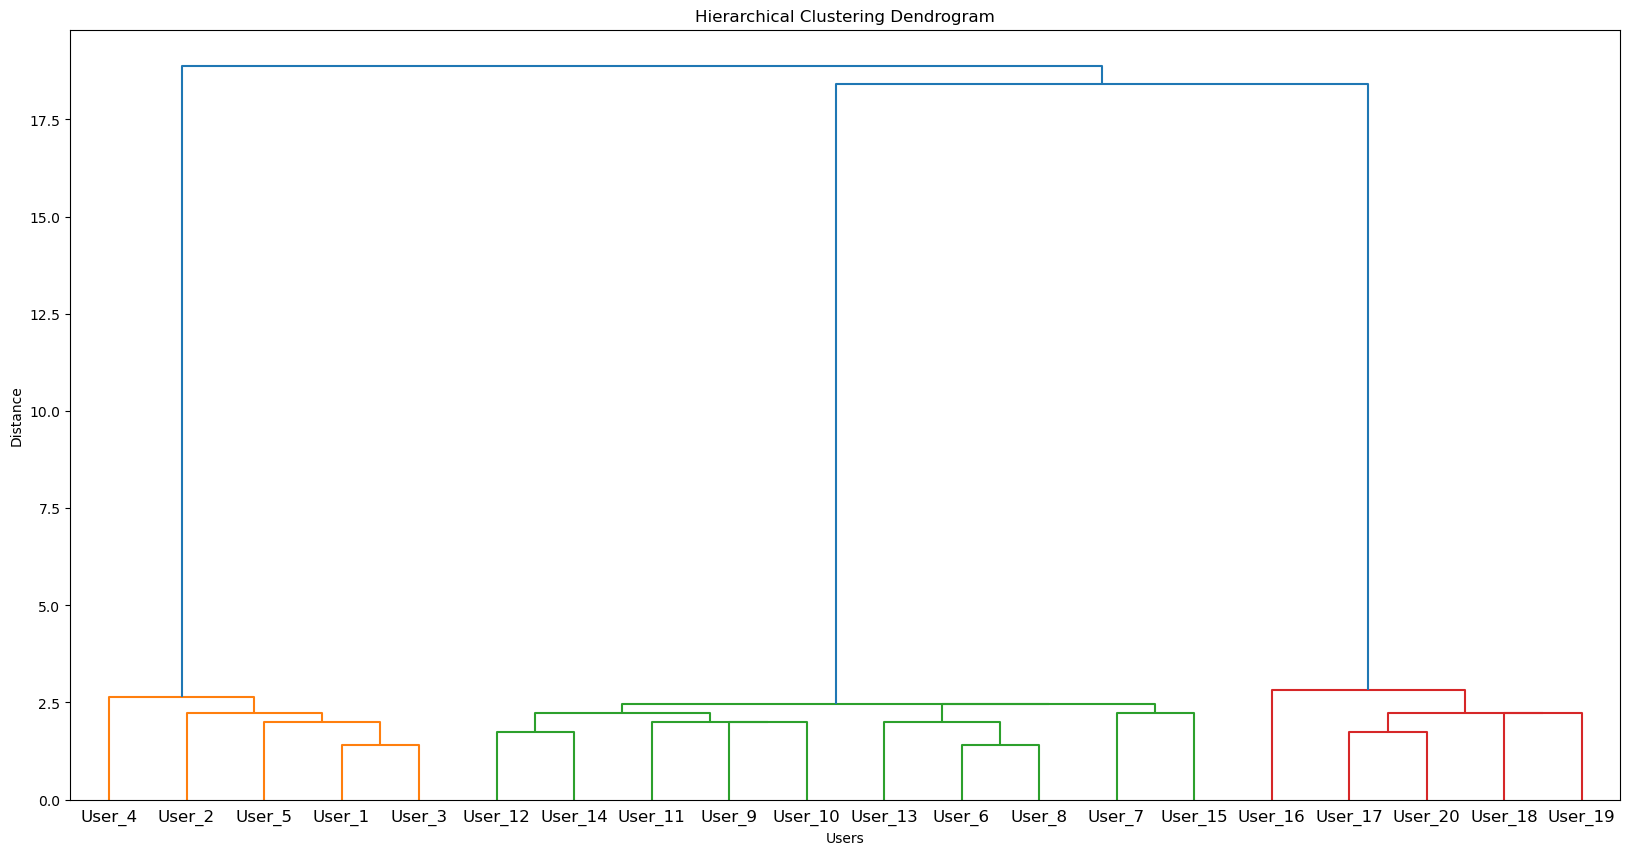

In [541]:
# Hierarchical clustering - SINGLE
linkage_matrix = linkage(explicit_matrix, method='single', metric='euclidean')

# Dendrogram
plt.figure(figsize=(20, 10))
dendrogram(linkage_matrix, labels=explicit_matrix.index, orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Users')
plt.ylabel('Distance')
plt.show()

fig = ff.create_dendrogram(explicit_matrix.values, orientation='bottom', labels=explicit_matrix.index, linkagefun=lambda x: linkage_matrix)
fig.update_layout(width=800, height=500, title='Hierarchical Clustering Dendrogram')
fig.show()


`WARD` linkage method
- minimizes the variance of the clusters being merged

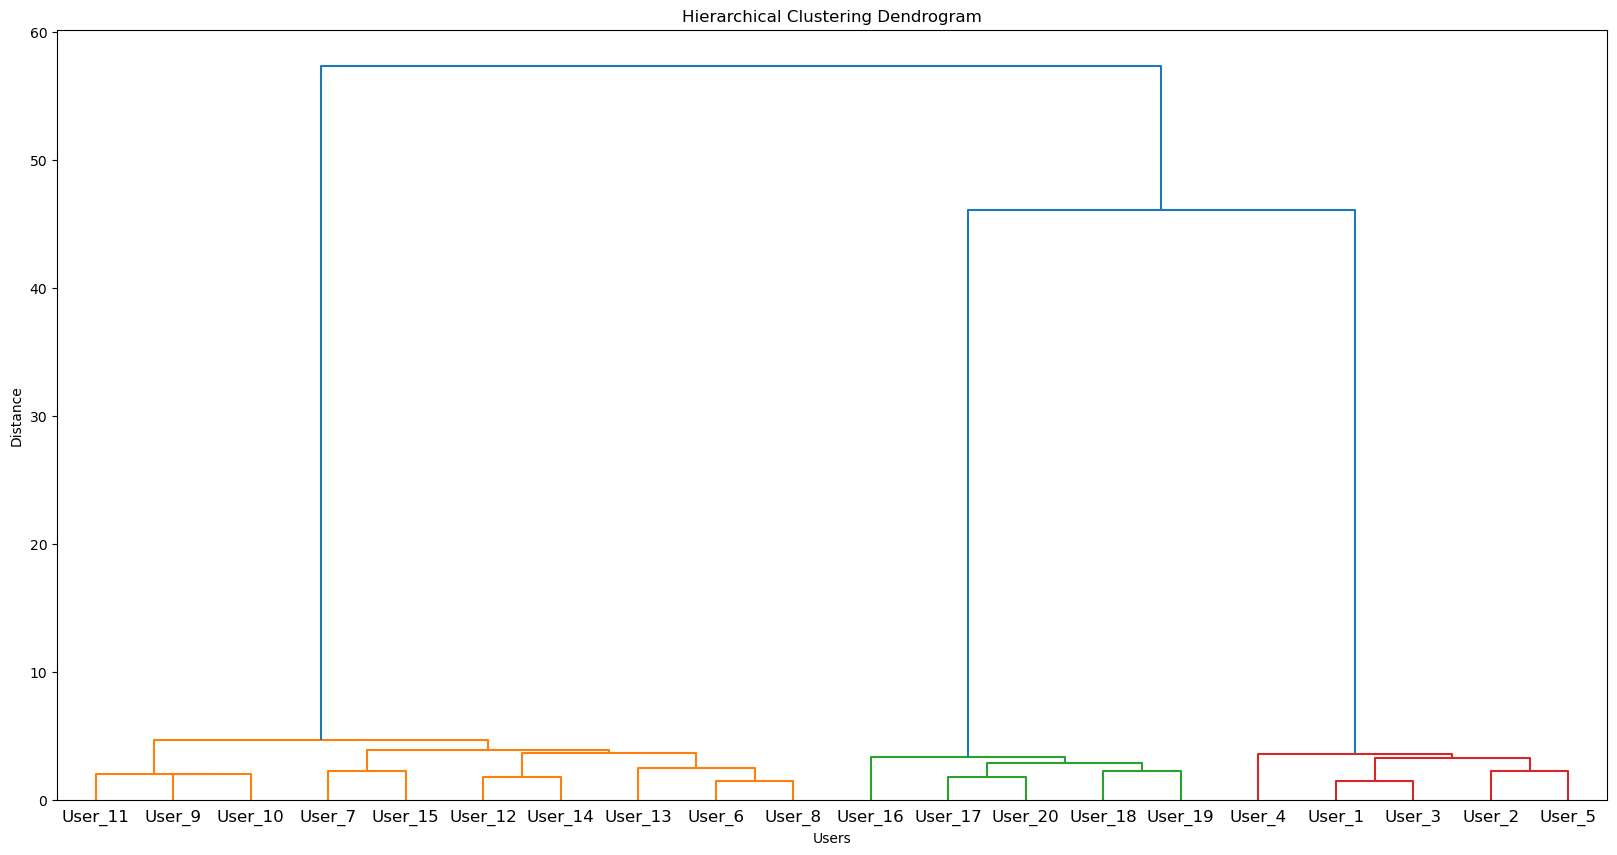

In [542]:
# Hierarchical clustering - ward
linkage_matrix = linkage(explicit_matrix, method='ward', metric='euclidean')

# Dendrogram
plt.figure(figsize=(20, 10))
dendrogram(linkage_matrix, labels=explicit_matrix.index, orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Users')
plt.ylabel('Distance')
plt.show()

fig = ff.create_dendrogram(explicit_matrix.values, orientation='bottom', labels=explicit_matrix.index, linkagefun=lambda x: linkage_matrix)
fig.update_layout(width=800, height=500, title='Hierarchical Clustering Dendrogram')
fig.show()

`AVERAGE` linkage method
- average distance between all pairs of points in the two clusters

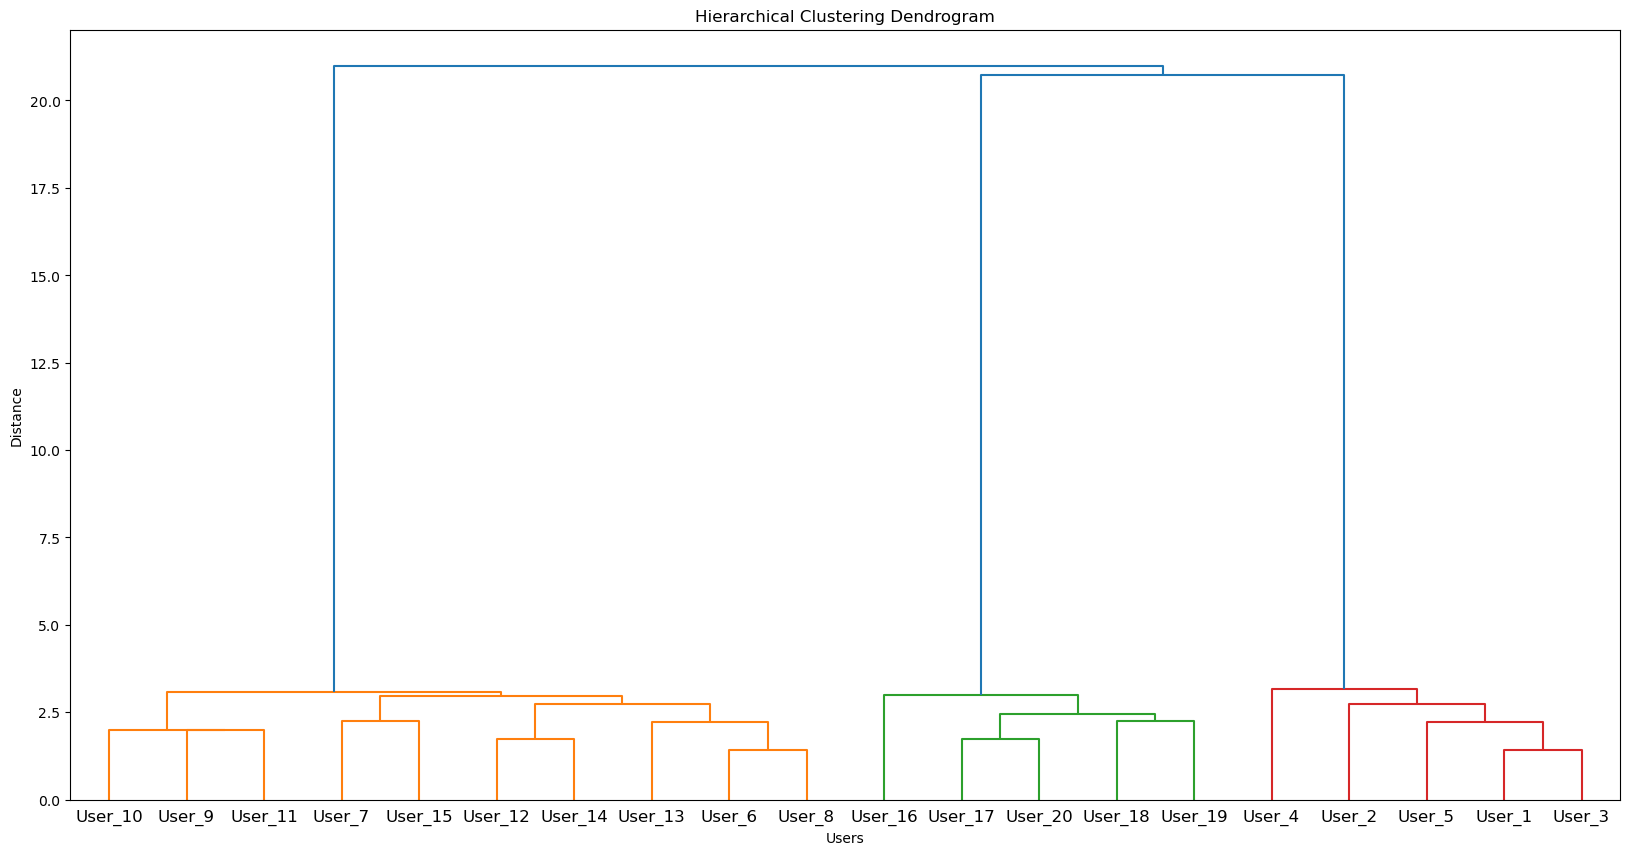

In [543]:
# Hierarchical clustering - AVERAGE
linkage_matrix = linkage(explicit_matrix, method='average', metric='euclidean')

# Dendrogram
plt.figure(figsize=(20, 10))
dendrogram(linkage_matrix, labels=explicit_matrix.index, orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Users')
plt.ylabel('Distance')
plt.show()

fig = ff.create_dendrogram(df.values, orientation='bottom', labels=df.index, linkagefun=lambda x: linkage_matrix)
fig.update_layout(width=800, height=500, title='Hierarchical Clustering Dendrogram')
fig.show()

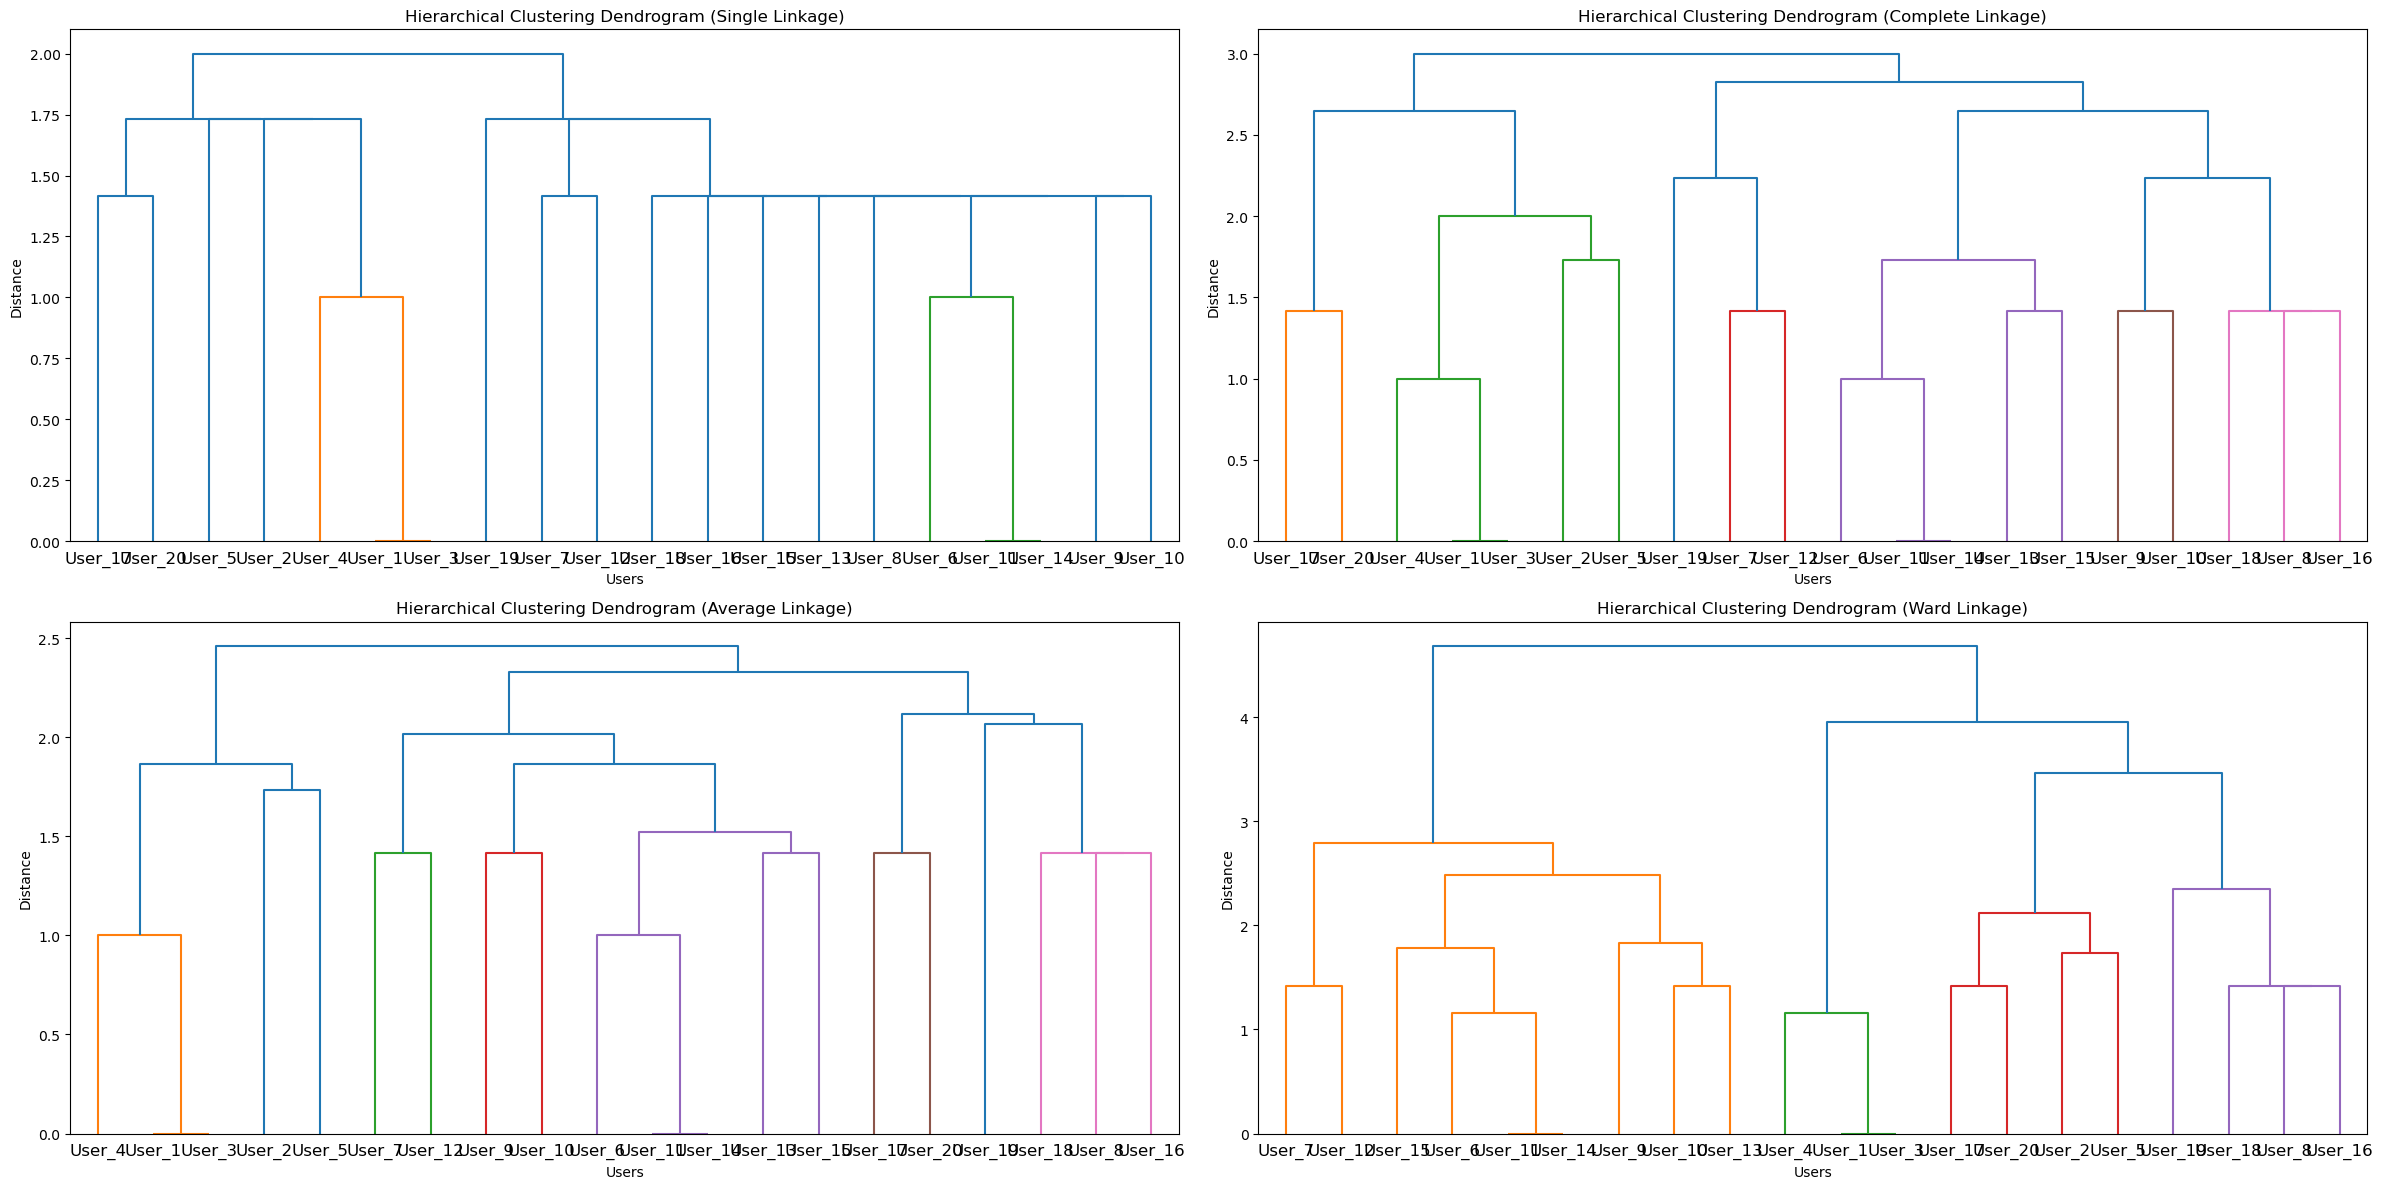

In [544]:
# Hierarchical clustering with different linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']

plt.figure(figsize=(24, 12))
for i, method in enumerate(linkage_methods):
    plt.subplot(2, 2, i + 1)
    Z = linkage(df, method=method, metric='euclidean')
    dendrogram(Z, labels=df.index)
    plt.title(f'Hierarchical Clustering Dendrogram ({method.capitalize()} Linkage)')
    plt.xlabel('Users')
    plt.ylabel('Distance')
plt.tight_layout()
plt.show()